# 🏀 Predicting NBA Player Performance: A Case Study on Stephen Curry

This project aims to build a simple machine learning model to predict the number of points scored by NBA star **Stephen Curry** in a game based on key game-level statistics. It is a regression problem using supervised learning.

## 🎯 Objective

The goal of this project is to predict Stephen Curry's **points scored in a game** using basic features such as field goal attempts, three-point attempts, minutes played, and more. This helps in understanding what factors most influence his scoring and can be extended to other players or match scenarios.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 📊 Dataset

- **Source**: [Basketball-Reference.com](https://www.basketball-reference.com/players/c/curryst01/gamelog/)
- **Season used**: 2024–2025 
- **Description**: The dataset includes one row per game, with columns like:
  - Date
  - Opponent
  - Minutes Played (MIN)
  - Field Goals Attempted (FGA)
  - 3-Point Attempts (3PA)
  - Free Throw Attempts (FTA)
  - Points Scored (PTS)
  - Home/Away Indicator, etc.

In [9]:
df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\sportsref_download.csv")
df

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,957,1,2024-10-23,GSW,@,POR,"W, 140-104",*,25:04,...,9,9,10,2,0,2,0,17,21.3,23
1,2,958,2,2024-10-25,GSW,@,UTA,"W, 127-86",*,27:25,...,3,3,4,2,0,3,3,20,10.3,22
2,3,959,3,2024-10-27,GSW,NaN,LAC,"L, 104-112",*,26:42,...,4,4,6,2,1,6,1,18,14.4,2
3,4,960,7,2024-11-04,GSW,@,WAS,"W, 125-112",*,24:05,...,2,3,6,0,0,2,1,24,19.4,9
4,5,961,8,2024-11-06,GSW,@,BOS,"W, 118-112",*,34:23,...,7,7,9,4,1,3,2,27,27.6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,1022,78,2025-04-06,GSW,NaN,HOU,"L, 96-106",*,32:40,...,2,2,8,0,0,4,0,3,-1.4,-4
66,67,1023,79,2025-04-08,GSW,@,PHO,"W, 133-95",*,25:55,...,8,9,6,1,1,2,0,25,23.7,31
67,68,1024,80,2025-04-09,GSW,NaN,SAS,"L, 111-114",*,36:35,...,6,8,3,2,0,1,0,30,24.3,13
68,69,1025,81,2025-04-11,GSW,@,POR,"W, 103-86",*,27:20,...,4,5,5,0,1,1,2,14,10.9,8


In [11]:
df.head()

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,957,1,2024-10-23,GSW,@,POR,"W, 140-104",*,25:04,...,9,9,10,2,0,2,0,17,21.3,23
1,2,958,2,2024-10-25,GSW,@,UTA,"W, 127-86",*,27:25,...,3,3,4,2,0,3,3,20,10.3,22
2,3,959,3,2024-10-27,GSW,NaN,LAC,"L, 104-112",*,26:42,...,4,4,6,2,1,6,1,18,14.4,2
3,4,960,7,2024-11-04,GSW,@,WAS,"W, 125-112",*,24:05,...,2,3,6,0,0,2,1,24,19.4,9
4,5,961,8,2024-11-06,GSW,@,BOS,"W, 118-112",*,34:23,...,7,7,9,4,1,3,2,27,27.6,7


In [13]:
df.tail()

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
65,66,1022,78,2025-04-06,GSW,NaN,HOU,"L, 96-106",*,32:40,...,2,2,8,0,0,4,0,3,-1.4,-4
66,67,1023,79,2025-04-08,GSW,@,PHO,"W, 133-95",*,25:55,...,8,9,6,1,1,2,0,25,23.7,31
67,68,1024,80,2025-04-09,GSW,NaN,SAS,"L, 111-114",*,36:35,...,6,8,3,2,0,1,0,30,24.3,13
68,69,1025,81,2025-04-11,GSW,@,POR,"W, 103-86",*,27:20,...,4,5,5,0,1,1,2,14,10.9,8
69,70,1026,82,2025-04-13,GSW,NaN,LAC,"L, 119-124 (OT)",*,38:00,...,2,3,6,2,0,8,2,36,24.7,-16


In [15]:
df.describe()

,Rk,Gcar,Gtm,FG,FGA,FG%,3P,3PA,3P%,2P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.500000,991.500000,42.700000,8.057143,17.971429,0.445414,4.442857,11.200000,0.392371,3.614286,...,3.857143,4.428571,6.014286,1.142857,0.428571,2.857143,1.357143,24.542857,18.881429,4.271429
std,20.351085,20.351085,23.495513,3.296400,5.651655,0.130263,2.350675,3.884566,0.151744,1.980286,...,2.234679,2.331706,2.678377,1.067107,0.649892,1.581466,1.103824,9.931192,9.035506,14.315211
min,1.000000,957.000000,1.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1.600000,-41.000000
25%,18.250000,974.250000,23.250000,6.000000,14.000000,0.382500,3.000000,9.000000,0.300000,2.000000,...,2.000000,3.000000,4.000000,0.000000,0.000000,2.000000,0.000000,18.000000,13.525000,-3.750000
50%,35.500000,991.500000,43.500000,8.000000,18.000000,0.458500,4.000000,11.000000,0.380000,3.500000,...,4.000000,4.000000,6.000000,1.000000,0.000000,3.000000,1.000000,24.000000,19.250000,4.500000
75%,52.750000,1008.750000,61.750000,10.000000,21.000000,0.518250,5.750000,14.000000,0.500000,5.000000,...,5.750000,6.750000,7.750000,2.000000,1.000000,4.000000,2.000000,30.000000,24.675000,13.750000
max,70.000000,1026.000000,82.000000,16.000000,35.000000,0.750000,12.000000,20.000000,1.000000,9.000000,...,9.000000,10.000000,13.000000,5.000000,3.000000,8.000000,4.000000,56.000000,48.600000,32.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          70 non-null     int64  
 1   Gcar        70 non-null     int64  
 2   Gtm         70 non-null     int64  
 3   Date        70 non-null     object 
 4   Team        70 non-null     object 
 5   Unnamed: 5  36 non-null     object 
 6   Opp         70 non-null     object 
 7   Result      70 non-null     object 
 8   GS          70 non-null     object 
 9   MP          70 non-null     object 
 10  FG          70 non-null     int64  
 11  FGA         70 non-null     int64  
 12  FG%         70 non-null     float64
 13  3P          70 non-null     int64  
 14  3PA         70 non-null     int64  
 15  3P%         70 non-null     float64
 16  2P          70 non-null     int64  
 17  2PA         70 non-null     int64  
 18  2P%         70 non-null     float64
 19  eFG%        70 non-null     flo

In [19]:
df.shape

(70, 34)

In [21]:
df.dtypes

Rk              int64
Gcar            int64
Gtm             int64
Date           object
Team           object
Unnamed: 5     object
Opp            object
Result         object
GS             object
MP             object
FG              int64
FGA             int64
FG%           float64
3P              int64
3PA             int64
3P%           float64
2P              int64
2PA             int64
2P%           float64
eFG%          float64
FT              int64
FTA             int64
FT%           float64
ORB             int64
DRB             int64
TRB             int64
AST             int64
STL             int64
BLK             int64
TOV             int64
PF              int64
PTS             int64
GmSc          float64
+/-             int64
dtype: object

In [23]:
df.isna().sum()

Rk             0
Gcar           0
Gtm            0
Date           0
Team           0
Unnamed: 5    34
Opp            0
Result         0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            7
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
+/-            0
dtype: int64

In [25]:
df.columns

Index(['Rk', 'Gcar', 'Gtm', 'Date', 'Team', 'Unnamed: 5', 'Opp', 'Result',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

## 📊 Dataset Columns

The dataset for Stephen Curry’s game log includes the following columns:

| **Column**   | **Meaning** |
|--------------|-------------|
| **Rk**       | Rank/row number (for ordering purposes) |
| **Gcar**     | Game number in **career** (e.g., 950th game overall) |
| **Gtm**      | Game number in **season** (e.g., 32nd game this season) |
| **Date**     | Date of the game |
| **Team**     | Team abbreviation (GSW for Golden State Warriors) |
| **Unnamed: 5** | Indicates **"@"** if it was an **away** game; blank for home games |
| **Opp**      | Opponent team abbreviation |
| **Result**   | Result of the game (e.g., "W (+12)" means a win by 12 points) |
| **GS**       | Games started (1 if Curry started, 0 if not) |
| **MP**       | Minutes Played |
| **FG**       | Field Goals Made |
| **FGA**      | Field Goals Attempted |
| **FG%**      | Field Goal Percentage |
| **3P**       | 3-Point Field Goals Made |
| **3PA**      | 3-Point Field Goals Attempted |
| **3P%**      | 3-Point Field Goal Percentage |
| **2P**       | 2-Point Field Goals Made |
| **2PA**      | 2-Point Field Goals Attempted |
| **2P%**      | 2-Point Field Goal Percentage |
| **eFG%**     | Effective Field Goal % (adjusts for 3-pointers being worth more) |
| **FT**       | Free Throws Made |
| **FTA**      | Free Throws Attempted |
| **FT%**      | Free Throw Percentage |
| **ORB**      | Offensive Rebounds |
| **DRB**      | Defensive Rebounds |
| **TRB**      | Total Rebounds (ORB + DRB) |
| **AST**      | Assists |
| **STL**      | Steals |
| **BLK**      | Blocks |
| **TOV**      | Turnovers |
| **PF**       | Personal Fouls |
| **PTS**      | **Points Scored** (your prediction target) |
| **GmSc**     | Game Score (a single-value performance metric) |
| **+/-**      | Point differential while the player was on the floor |

---

## ✅ Key Columns to Consider:

- **Features (Inputs)**: `MP`, `FGA`, `3PA`, `FTA`, `AST`, `TOV`, `+/-`, `Home/Away` (from **Unnamed: 5**)
- **Target (Output)**: `PTS` (Points Scored)



In [31]:
# Drop unwanted columns in place
df.drop(columns=['Rk', 'Gcar', 'Gtm', 'Date', 'Team', 'Unnamed: 5', 'Opp', 'Result', 'GS', 'GmSc', '+/-'], inplace=True)
df.head()


,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25:04,4,10,0.400,3,7,0.429,1,3,0.333,...,1.0,0,9,9,10,2,0,2,0,17
1,27:25,7,20,0.350,4,13,0.308,3,7,0.429,...,1.0,0,3,3,4,2,0,3,3,20
2,26:42,6,11,0.545,4,7,0.571,2,4,0.500,...,1.0,0,4,4,6,2,1,6,1,18
3,24:05,7,15,0.467,4,9,0.444,3,6,0.500,...,1.0,1,2,3,6,0,0,2,1,24
4,34:23,8,17,0.471,4,9,0.444,4,8,0.500,...,1.0,0,7,7,9,4,1,3,2,27


In [33]:
df.columns

Index(['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [35]:
df.isna().sum()

MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     7
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

In [37]:
m=df.select_dtypes(include=['int','float'])
m.columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

array([[<Axes: title={'center': 'FG'}>, <Axes: title={'center': 'FGA'}>,
        <Axes: title={'center': 'FG%'}>, <Axes: title={'center': '3P'}>,
        <Axes: title={'center': '3PA'}>],
       [<Axes: title={'center': '3P%'}>, <Axes: title={'center': '2P'}>,
        <Axes: title={'center': '2PA'}>, <Axes: title={'center': '2P%'}>,
        <Axes: title={'center': 'eFG%'}>],
       [<Axes: title={'center': 'FT'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FT%'}>, <Axes: title={'center': 'ORB'}>,
        <Axes: title={'center': 'DRB'}>],
       [<Axes: title={'center': 'TRB'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'STL'}>, <Axes: title={'center': 'BLK'}>,
        <Axes: title={'center': 'TOV'}>],
       [<Axes: title={'center': 'PF'}>, <Axes: title={'center': 'PTS'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

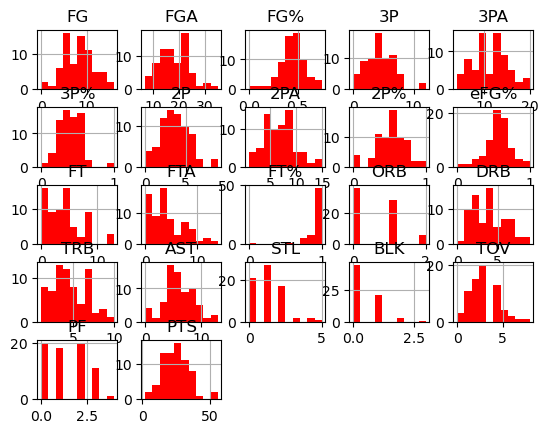

In [39]:
m.hist(color='r')

In [41]:
for i in ['FT%']:
    df[i]=df[i].fillna(df[i].median())
df[i]    

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
65    1.0
66    1.0
67    1.0
68    1.0
69    1.0
Name: FT%, Length: 70, dtype: float64

In [45]:
n=df.select_dtypes(include=['object'])
n.columns

Index(['MP'], dtype='object')




### 📊 Visualizing Statistical Distributions with Boxplots

To understand the spread, central tendency, and presence of outliers in Stephen Curry's performance metrics, we use **boxplots** for various game-level features.

#### 🧱 Why Boxplots?

Boxplots provide a concise summary of:

* **Median** (central line)
* **Interquartile range (IQR)** (box edges)
* **Minimum and maximum values** within 1.5×IQR
* **Outliers**, if any, shown as individual points

#### 📈 What We Visualize:

We plot boxplots for the following game statistics:

* Shooting metrics: `FG`, `FGA`, `FG%`, `3P`, `3PA`, `3P%`, `2P`, `2PA`, `2P%`, `eFG%`
* Free throws: `FT`, `FTA`, `FT%`
* Rebounds: `ORB`, `DRB`, `TRB`
* Playmaking and defense: `AST`, `STL`, `BLK`, `TOV`, `PF`
* Scoring: `PTS`

These plots help us identify skewness, anomalies, and potential outliers for each feature—guiding preprocessing and feature engineering decisions.


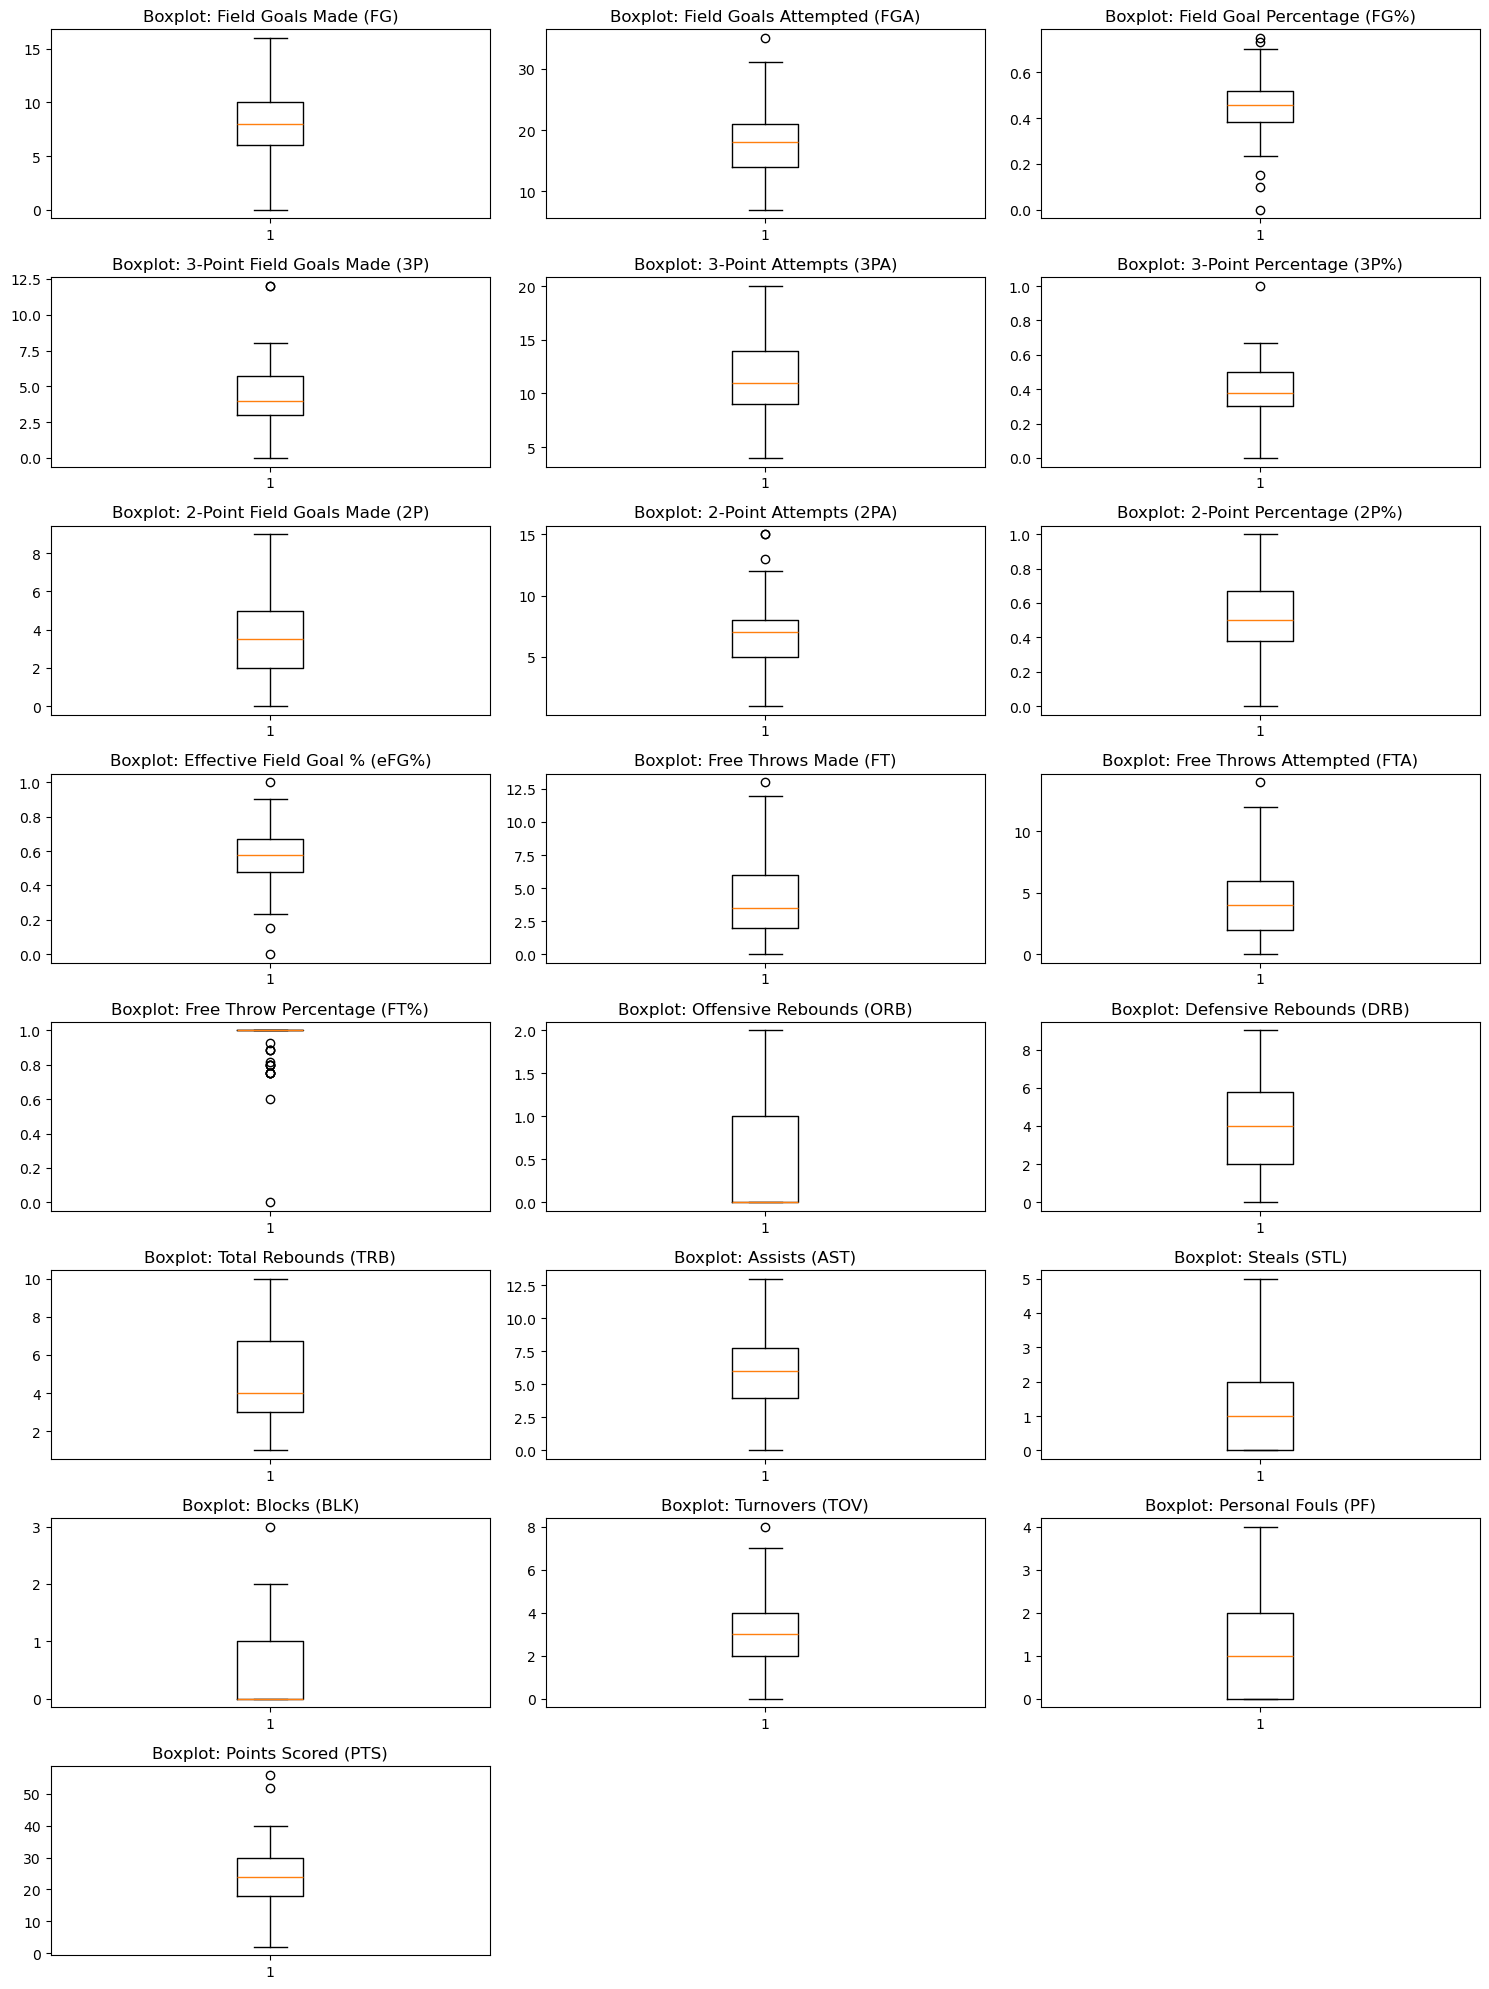

In [69]:
import matplotlib.pyplot as plt

# Set up the figure with enough space for 22 plots (8 rows × 3 columns = 24 slots)
plt.figure(figsize=(15, 20))

# List of columns and titles
columns = [
    ('FG', 'Field Goals Made (FG)'),
    ('FGA', 'Field Goals Attempted (FGA)'),
    ('FG%', 'Field Goal Percentage (FG%)'),
    ('3P', '3-Point Field Goals Made (3P)'),
    ('3PA', '3-Point Attempts (3PA)'),
    ('3P%', '3-Point Percentage (3P%)'),
    ('2P', '2-Point Field Goals Made (2P)'),
    ('2PA', '2-Point Attempts (2PA)'),
    ('2P%', '2-Point Percentage (2P%)'),
    ('eFG%', 'Effective Field Goal % (eFG%)'),
    ('FT', 'Free Throws Made (FT)'),
    ('FTA', 'Free Throws Attempted (FTA)'),
    ('FT%', 'Free Throw Percentage (FT%)'),
    ('ORB', 'Offensive Rebounds (ORB)'),
    ('DRB', 'Defensive Rebounds (DRB)'),
    ('TRB', 'Total Rebounds (TRB)'),
    ('AST', 'Assists (AST)'),
    ('STL', 'Steals (STL)'),
    ('BLK', 'Blocks (BLK)'),
    ('TOV', 'Turnovers (TOV)'),
    ('PF', 'Personal Fouls (PF)'),
    ('PTS', 'Points Scored (PTS)')
]

# Loop through and plot
for i, (col, title) in enumerate(columns):
    plt.subplot(8, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot: {title}')

# Adjust layout
plt.tight_layout()
plt.show()




### 📉 Outlier Removal

Outliers are data points that significantly differ from other observations and can negatively affect the performance of a machine learning model. In this project, we use the **Interquartile Range (IQR)** method to detect and remove outliers.

#### 🔍 IQR Method:

1. **Q1 (25th percentile)** and **Q3 (75th percentile)** are calculated for each numeric feature.
2. **IQR** is defined as:

   $$
   \text{IQR} = Q3 - Q1
   $$
3. A data point is considered an outlier if it falls outside the following range:

   $$
   [Q1 - 1.5 \times \text{IQR},\ Q3 + 1.5 \times \text{IQR}]
   $$

#### ✅ Why Remove Outliers?

* Outliers can **skew the distribution** of features.
* They may **bias the model** during training.
* Removing them can lead to **better generalization** and **model performance**.



In [73]:
##'FG'

In [75]:
Q1 = np.percentile(df['FG'], 25, method='midpoint')
Q2 = np.percentile(df['FG'], 50, method='midpoint')
Q3 = np.percentile(df['FG'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['FG']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 6.0
Q2= 8.0
Q3= 10.0
IQR= 4.0
uplimit: 16.0
lowerlimt: 0.0
outlier: []


In [83]:
##'FGA', 

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

In [85]:
Q1 = np.percentile(df['FGA'], 25, method='midpoint')
Q2 = np.percentile(df['FGA'], 50, method='midpoint')
Q3 = np.percentile(df['FGA'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['FGA']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 14.0
Q2= 18.0
Q3= 21.0
IQR= 7.0
uplimit: 31.5
lowerlimt: 3.5
outlier: [35]


In [87]:
df1=df['FGA']>upperlimit
df.loc[df1].index


Index([41], dtype='int64')

In [89]:
df2=df['FGA']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [91]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['FGA']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [93]:
#'FG%', 

In [95]:
Q1 = np.percentile(df['FG%'], 25, method='midpoint')
Q2 = np.percentile(df['FG%'], 50, method='midpoint')
Q3 = np.percentile(df['FG%'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['FG%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.387
Q2= 0.462
Q3= 0.519
IQR= 0.132
uplimit: 0.7170000000000001
lowerlimt: 0.189
outlier: [0.0, 0.154, 0.733, 0.75, 0.1]


In [97]:
df1=df['FG%']>upperlimit
df.loc[df1].index


Index([26, 58], dtype='int64')

In [99]:
df2=df['FG%']<lowerlimit
df.loc[df2].index


Index([20, 22, 64], dtype='int64')

In [101]:
df.drop((df.loc[df1].index),inplace = True)
df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['FG%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [103]:
#'3P',

In [105]:
Q1 = np.percentile(df['3P'], 25, method='midpoint')
Q2 = np.percentile(df['3P'], 50, method='midpoint')
Q3 = np.percentile(df['3P'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['3P']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 3.0
Q2= 4.0
Q3= 5.5
IQR= 2.5
uplimit: 9.25
lowerlimt: -0.75
outlier: [12, 12]


In [107]:
df1=df['3P']>upperlimit
df.loc[df1].index


Index([45, 57], dtype='int64')

In [109]:
df2=df['3P']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [111]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['3P']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [113]:
#'3PA', 

In [119]:
Q1 = np.percentile(df['3PA'], 25, method='midpoint')
Q2 = np.percentile(df['3PA'], 50, method='midpoint')
Q3 = np.percentile(df['3PA'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['3PA']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 9.0
Q2= 11.5
Q3= 13.5
IQR= 4.5
uplimit: 20.25
lowerlimt: 2.25
outlier: []


In [117]:
#'3P%', 

In [121]:
Q1 = np.percentile(df['3P%'], 25, method='midpoint')
Q2 = np.percentile(df['3P%'], 50, method='midpoint')
Q3 = np.percentile(df['3P%'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['3P%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.308
Q2= 0.38
Q3= 0.469
IQR= 0.16099999999999998
uplimit: 0.7104999999999999
lowerlimt: 0.06650000000000003
outlier: []


In [123]:
#'2P', 

In [125]:
Q1 = np.percentile(df['2P'], 25, method='midpoint')
Q2 = np.percentile(df['2P'], 50, method='midpoint')
Q3 = np.percentile(df['2P'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['2P']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 2.0
Q2= 3.5
Q3= 5.0
IQR= 3.0
uplimit: 9.5
lowerlimt: -2.5
outlier: []


In [127]:
#'2PA', 

In [129]:
Q1 = np.percentile(df['2PA'], 25, method='midpoint')
Q2 = np.percentile(df['2PA'], 50, method='midpoint')
Q3 = np.percentile(df['2PA'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['2PA']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 5.0
Q2= 7.0
Q3= 8.0
IQR= 3.0
uplimit: 12.5
lowerlimt: 0.5
outlier: [15, 13]


In [131]:
df1=df['2PA']>upperlimit
df.loc[df1].index


Index([7, 37], dtype='int64')

In [133]:
df2=df['2PA']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [135]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['2PA']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [137]:
#'2P%', 

In [139]:
Q1 = np.percentile(df['2P%'], 25, method='midpoint')
Q2 = np.percentile(df['2P%'], 50, method='midpoint')
Q3 = np.percentile(df['2P%'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['2P%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.4085
Q2= 0.528
Q3= 0.667
IQR= 0.25850000000000006
uplimit: 1.05475
lowerlimt: 0.02074999999999988
outlier: [0.0]


In [141]:
df1=df['2P%']>upperlimit
df.loc[df1].index


Index([], dtype='int64')

In [143]:
df2=df['2P%']<lowerlimit
df.loc[df2].index


Index([12], dtype='int64')

In [145]:
#df.drop((df.loc[df1].index),inplace = True)
df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['2P%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [147]:
#'eFG%',

In [149]:
Q1 = np.percentile(df['eFG%'], 25, method='midpoint')
Q2 = np.percentile(df['eFG%'], 50, method='midpoint')
Q3 = np.percentile(df['eFG%'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['eFG%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.5
Q2= 0.571
Q3= 0.645
IQR= 0.14500000000000002
uplimit: 0.8625
lowerlimt: 0.2825
outlier: [0.9]


In [151]:
df1=df['eFG%']>upperlimit
df.loc[df1].index


Index([9], dtype='int64')

In [153]:
df2=df['eFG%']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [155]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['eFG%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [157]:
#'FT', 

In [159]:
Q1 = np.percentile(df['FT'], 25, method='midpoint')
Q2 = np.percentile(df['FT'], 50, method='midpoint')
Q3 = np.percentile(df['FT'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['FT']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 2.0
Q2= 3.0
Q3= 6.0
IQR= 4.0
uplimit: 12.0
lowerlimt: -4.0
outlier: [13]


In [161]:
df1=df['FT']>upperlimit
df.loc[df1].index


Index([52], dtype='int64')

In [163]:
df1=df['FT']>upperlimit
df.loc[df1].index


Index([52], dtype='int64')

In [165]:
df2=df['FT']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [167]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['FT']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [169]:
#'FTA', 

In [171]:
Q1 = np.percentile(df['FTA'], 25, method='midpoint')
Q2 = np.percentile(df['FTA'], 50, method='midpoint')
Q3 = np.percentile(df['FTA'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['FTA']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 2.0
Q2= 4.0
Q3= 6.0
IQR= 4.0
uplimit: 12.0
lowerlimt: -4.0
outlier: []


In [173]:
#'FT%', 

In [175]:
Q1 = np.percentile(df['FT%'], 25, method='midpoint')
Q2 = np.percentile(df['FT%'], 50, method='midpoint')
Q3 = np.percentile(df['FT%'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['FT%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 1.0
Q2= 1.0
Q3= 1.0
IQR= 0.0
uplimit: 1.0
lowerlimt: 1.0
outlier: [0.75, 0.8, 0.818, 0.0, 0.8, 0.75, 0.75, 0.889, 0.75, 0.889, 0.75, 0.889, 0.8]


In [177]:
df1=df['FT%']>upperlimit
df.loc[df1].index


Index([], dtype='int64')

In [179]:
df2=df['FT%']<lowerlimit
df.loc[df2].index


Index([6, 11, 14, 15, 17, 30, 34, 35, 36, 37, 42, 48, 50], dtype='int64')

In [183]:
#df.drop((df.loc[df1].index),inplace = True)
df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['FT%']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [185]:
#'ORB', 

In [187]:
Q1 = np.percentile(df['ORB'], 25, method='midpoint')
Q2 = np.percentile(df['ORB'], 50, method='midpoint')
Q3 = np.percentile(df['ORB'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['ORB']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.0
Q2= 1.0
Q3= 1.0
IQR= 1.0
uplimit: 2.5
lowerlimt: -1.5
outlier: []


In [189]:
#'DRB', 

In [191]:
Q1 = np.percentile(df['DRB'], 25, method='midpoint')
Q2 = np.percentile(df['DRB'], 50, method='midpoint')
Q3 = np.percentile(df['DRB'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['DRB']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 2.0
Q2= 4.0
Q3= 6.0
IQR= 4.0
uplimit: 12.0
lowerlimt: -4.0
outlier: []


In [193]:
#'TRB', 

In [195]:
Q1 = np.percentile(df['TRB'], 25, method='midpoint')
Q2 = np.percentile(df['TRB'], 50, method='midpoint')
Q3 = np.percentile(df['TRB'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['TRB']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 2.5
Q2= 4.0
Q3= 7.0
IQR= 4.5
uplimit: 13.75
lowerlimt: -4.25
outlier: []


In [197]:
#'AST', 

In [199]:
Q1 = np.percentile(df['AST'], 25, method='midpoint')
Q2 = np.percentile(df['AST'], 50, method='midpoint')
Q3 = np.percentile(df['AST'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['AST']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 4.0
Q2= 6.0
Q3= 7.0
IQR= 3.0
uplimit: 11.5
lowerlimt: -0.5
outlier: [12, 13]


In [201]:
df1=df['AST']>upperlimit
df.loc[df1].index


Index([23, 31], dtype='int64')

In [203]:
df2=df['AST']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [205]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['AST']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [207]:
#'STL', 

In [209]:
Q1 = np.percentile(df['STL'], 25, method='midpoint')
Q2 = np.percentile(df['STL'], 50, method='midpoint')
Q3 = np.percentile(df['STL'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['STL']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 1.0
Q2= 1.0
Q3= 2.0
IQR= 1.0
uplimit: 3.5
lowerlimt: -0.5
outlier: [4, 4]


In [211]:
df1=df['STL']>upperlimit
df.loc[df1].index


Index([4, 6], dtype='int64')

In [213]:
df2=df['STL']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [215]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['STL']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [217]:
#'BLK', 

In [219]:
Q1 = np.percentile(df['BLK'], 25, method='midpoint')
Q2 = np.percentile(df['BLK'], 50, method='midpoint')
Q3 = np.percentile(df['BLK'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['BLK']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
uplimit: 2.5
lowerlimt: -1.5
outlier: []


In [221]:
#'TOV',

In [223]:
Q1 = np.percentile(df['TOV'], 25, method='midpoint')
Q2 = np.percentile(df['TOV'], 50, method='midpoint')
Q3 = np.percentile(df['TOV'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['TOV']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 2.0
Q2= 3.0
Q3= 4.0
IQR= 2.0
uplimit: 7.0
lowerlimt: -1.0
outlier: [8]


In [225]:
df1=df['TOV']>upperlimit
df.loc[df1].index


Index([39], dtype='int64')

In [227]:
df2=df['TOV']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [229]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['TOV']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


In [231]:
#'PF', 

In [233]:
Q1 = np.percentile(df['PF'], 25, method='midpoint')
Q2 = np.percentile(df['PF'], 50, method='midpoint')
Q3 = np.percentile(df['PF'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['PF']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 0.0
Q2= 1.0
Q3= 2.0
IQR= 2.0
uplimit: 5.0
lowerlimt: -3.0
outlier: []


In [ ]:
#'PTS'

In [235]:
Q1 = np.percentile(df['PTS'], 25, method='midpoint')
Q2 = np.percentile(df['PTS'], 50, method='midpoint')
Q3 = np.percentile(df['PTS'], 75, method='midpoint')

print('Q1=', Q1)
print('Q2=', Q2)
print('Q3=', Q3)

IQR = Q3 - Q1
print('IQR=',IQR)

upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR
print('uplimit:',upperlimit)
print('lowerlimt:',lowerlimit)

outlier=[]
for x in df['PTS']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier) 

Q1= 17.5
Q2= 23.0
Q3= 26.0
IQR= 8.5
uplimit: 38.75
lowerlimt: 4.75
outlier: [40]


In [237]:
df1=df['PTS']>upperlimit
df.loc[df1].index


Index([29], dtype='int64')

In [239]:
df2=df['PTS']<lowerlimit
df.loc[df2].index


Index([], dtype='int64')

In [241]:
df.drop((df.loc[df1].index),inplace = True)
#df.drop((df.loc[df2].index),inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace = True)

outlier=[]
for x in df['PTS']:
  if((x>upperlimit) or (x<lowerlimit)):
    outlier.append(x)
print('outlier:',outlier)

outlier: []


## 📊 Data Visualization

In this section, we visualize Stephen Curry’s 2024–25 game-by-game performance to uncover trends, correlations, and situational patterns.

### 🏀 1. Distribution of Points Scored

We plot a histogram with a KDE (Kernel Density Estimate) to observe the overall scoring distribution. This helps understand how often Curry scores within specific point ranges and highlights any skewness or multi-modality in his performance.

### 📈 2. Correlation Heatmap

A correlation matrix reveals relationships between key numerical features—like Field Goal Attempts (FGA), 3-Point Attempts (3PA), Minutes Played (MP), and Points Scored (PTS). This aids in selecting impactful features for predictive modeling.

### 🎯 3. FGA vs PTS

This scatter plot shows how Curry’s total field goal attempts influence his point totals. A positive trend here validates that more shooting generally leads to higher scoring games.

### 🎯 4. 3PA vs PTS

Here, we examine Curry’s 3-point attempts against his total points, highlighting the role of long-range shooting in his scoring output—a known strength of his game.

### 🕒 5. Minutes Played vs PTS

This plot visualizes whether increased playing time translates to more points, which may reflect his role, game context, or coaching strategy.

### 🥧 6. Shot-Type Contribution (Pie Chart)

This pie chart shows the breakdown of Curry's total points scored during the 2024–25 season based on the type of shot:

- 🏀 **3-Point FG**
- 🏀 **2-Point FG**
- 🏀 **Free Throws**

It visually highlights Curry’s signature reliance on 3-pointers while also reflecting his efficiency in other scoring methods.


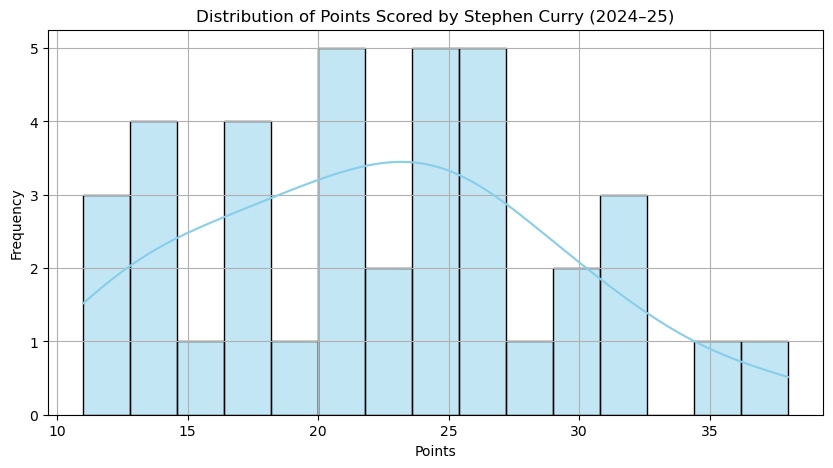

In [244]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PTS'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Points Scored by Stephen Curry (2024–25)')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


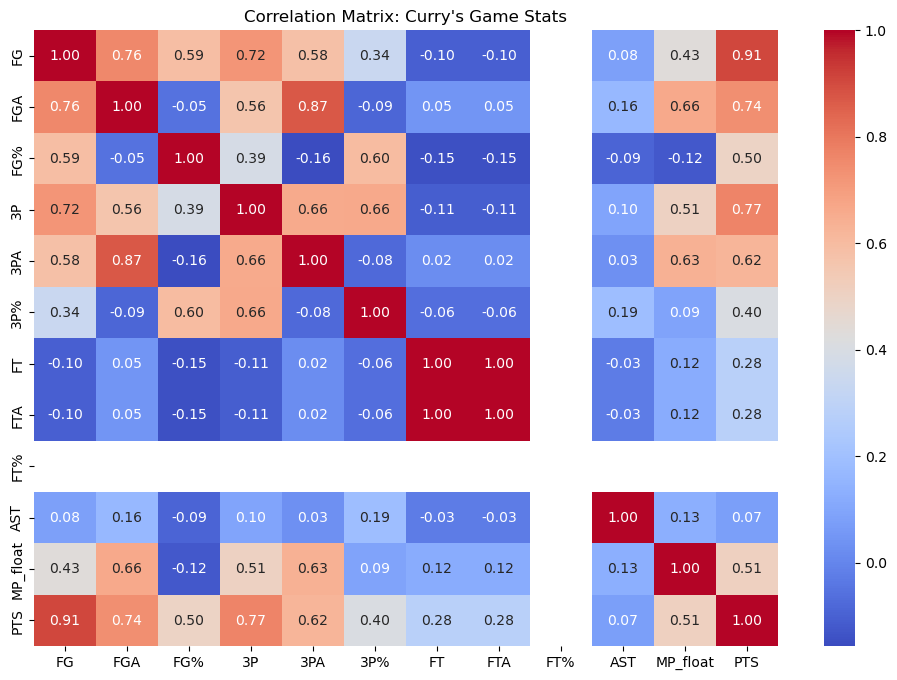

In [256]:
# Convert 'MP' (e.g., '25:04') to float minutes
df['MP_float'] = df['MP'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60 if isinstance(x, str) and ':' in x else None)

# List of numeric columns to include in correlation matrix
numerical_cols = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'MP_float', 'PTS']

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Curry's Game Stats")
plt.show()


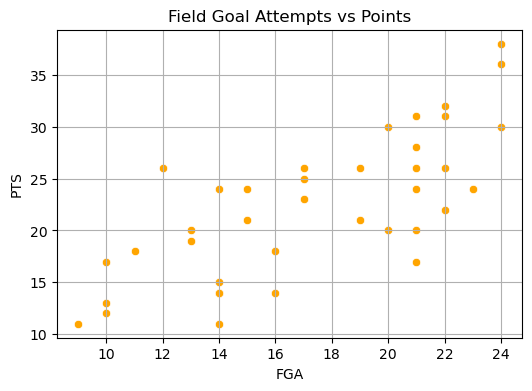

In [258]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='FGA', y='PTS', color='orange')
plt.title('Field Goal Attempts vs Points')
plt.xlabel('FGA')
plt.ylabel('PTS')
plt.grid(True)
plt.show()


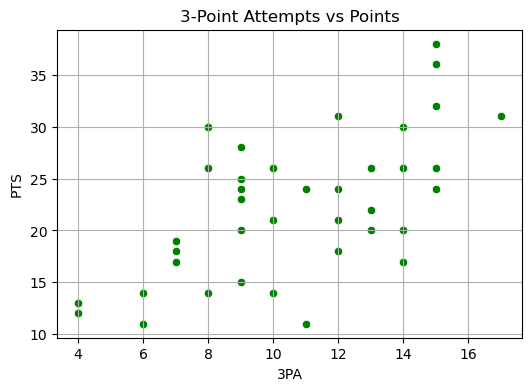

In [260]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='3PA', y='PTS', color='green')
plt.title('3-Point Attempts vs Points')
plt.xlabel('3PA')
plt.ylabel('PTS')
plt.grid(True)
plt.show()


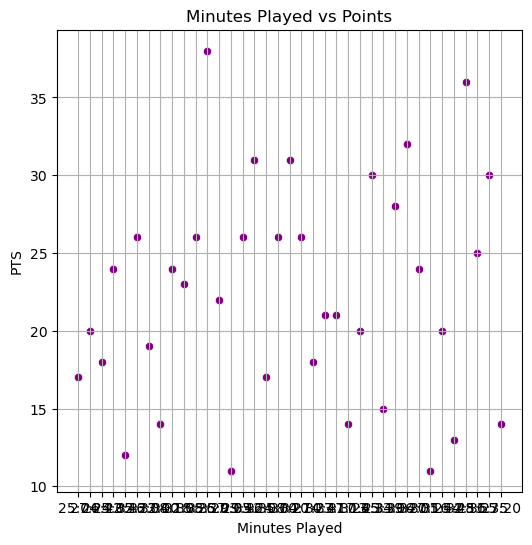

In [288]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='MP', y='PTS', color='purple')
plt.title('Minutes Played vs Points')
plt.xlabel('Minutes Played')
plt.ylabel('PTS')
plt.grid(True)
plt.show()


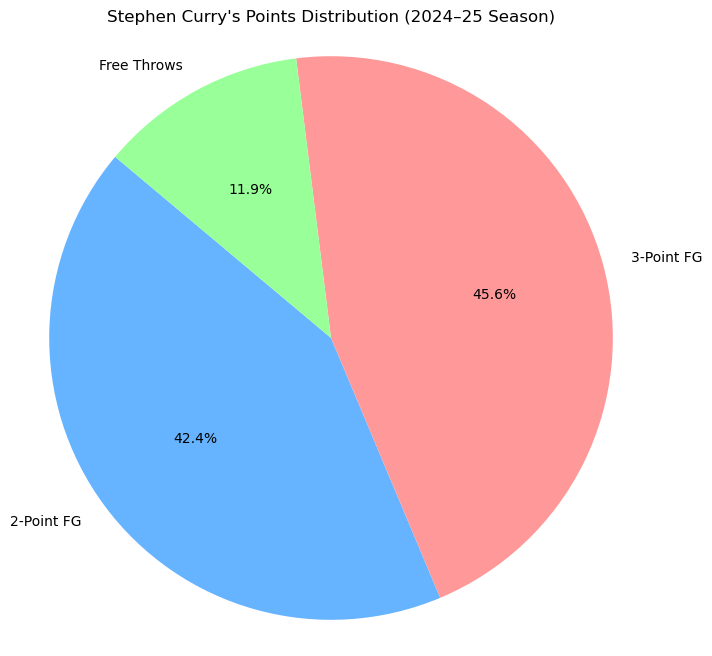

In [285]:
import matplotlib.pyplot as plt

# Total points from each shot type
total_fg_pts = df['FG'].sum() * 2 - df['3P'].sum()  # 2P field goals
total_3p_pts = df['3P'].sum() * 3
total_ft_pts = df['FT'].sum()

# Pie chart data
labels = ['2-Point FG', '3-Point FG', 'Free Throws']
sizes = [total_fg_pts, total_3p_pts, total_ft_pts]
colors = ['#66b3ff', '#ff9999', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Stephen Curry's Points Distribution (2024–25 Season)")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


## 🧠 Model Building

We frame this as a **regression problem** where:
- **Input features (X)**: `MIN`, `FGA`, `3PA`, `FTA`, etc.
- **Target (y)**: `PTS` (Points scored)

We split the data into training and testing sets, and then applied models like:
- Linear Regression (simple and interpretable)
- Random Forest Regressor (for capturing nonlinear relationships)

## 📊 Model Evaluation

To evaluate model performance, we used metrics like:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score**

In [296]:
# Linear Regression & Random Forest:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

In [302]:
# Feature set
X = df[[
    'MP_float', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'AST', 'TOV'
]]


# Target
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [304]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [350]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict the results
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse}")
print(f"Random Forest R²: {r2}")


Random Forest MSE: 15.647925000000004
Random Forest R²: 0.7098878331402085


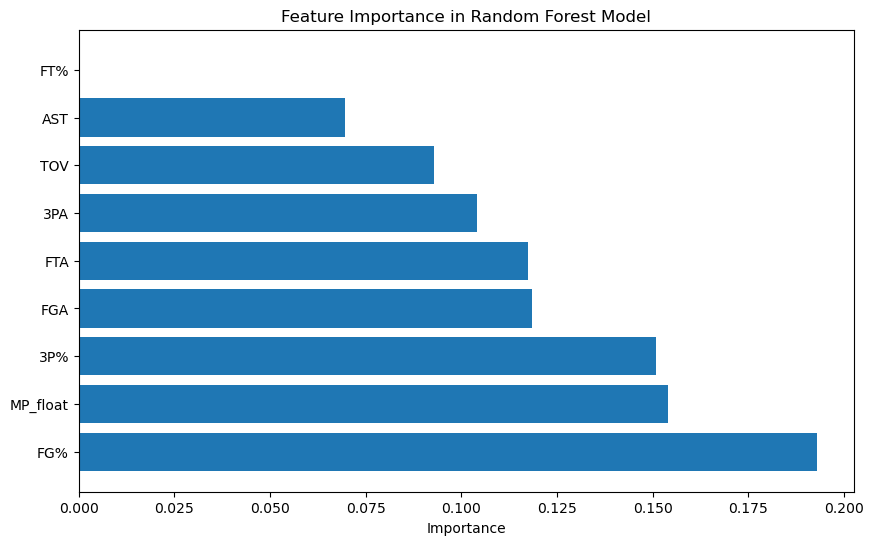

In [308]:
# Plot feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


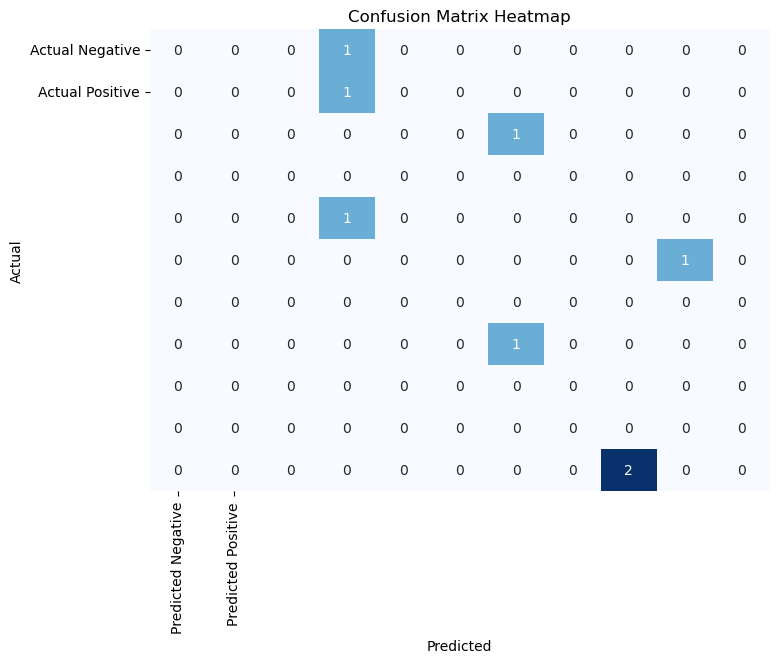

In [310]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [326]:
# linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [334]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluation for Linear Regression
print("Linear Regression Results")

# Calculate MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Linear Regression Results
Mean Squared Error (MSE): 0.64
Root Mean Squared Error (RMSE): 0.80
R-squared (R²): 0.99


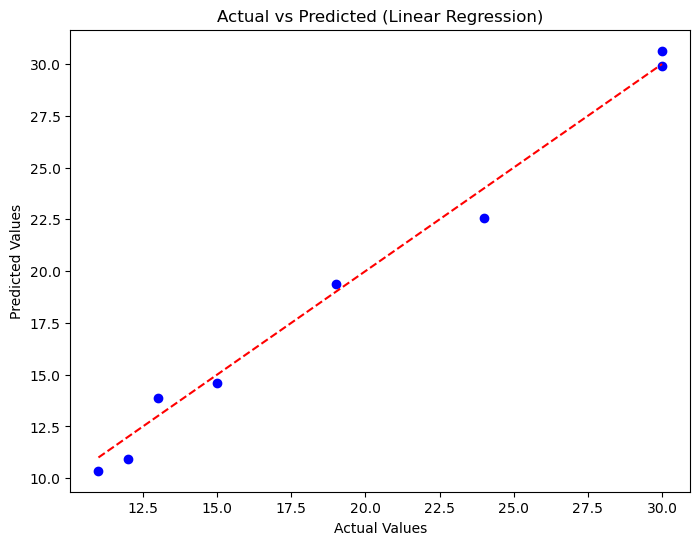

In [336]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()


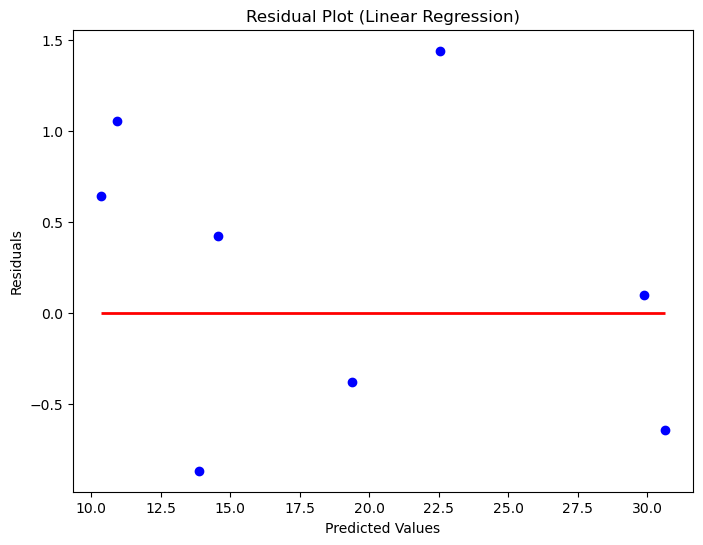

In [338]:
# Plot Residuals
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred_lr), xmax=max(y_pred_lr), colors='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show()


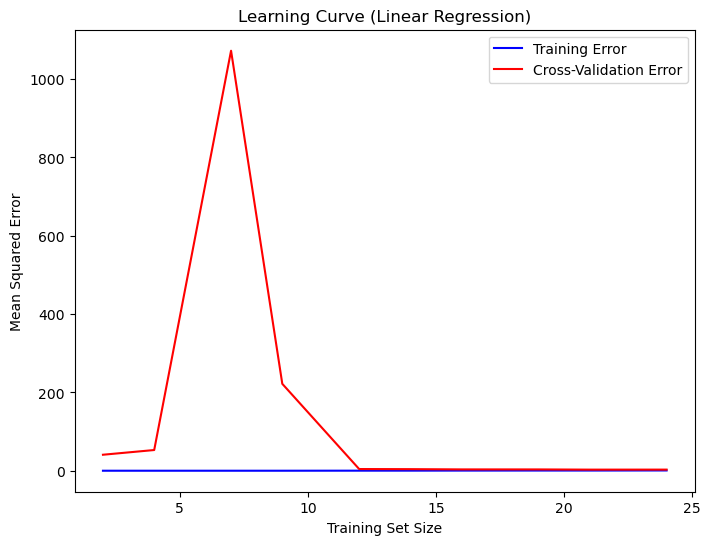

In [340]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error', color='blue')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Cross-Validation Error', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve (Linear Regression)')
plt.legend()
plt.show()



## 🧑‍💻 **Model Performance Comparison**

### 1. **Random Forest Regressor Results**

* **Mean Squared Error (MSE)**: 15.65
* **R-squared (R²)**: 0.71

The **Random Forest Regressor** provides a good balance between capturing complex patterns in the data while providing reasonable accuracy, as seen with an R² of **0.71**, indicating that 71% of the variance in the target variable (PTS) is explained by the model.

### 2. **Linear Regression Results**

* **Mean Squared Error (MSE)**: 0.64
* **Root Mean Squared Error (RMSE)**: 0.80
* **R-squared (R²)**: 0.99

The **Linear Regression** model performs exceptionally well with a very low MSE of **0.64** and an impressive R² of **0.99**, meaning that **99%** of the variance in the points scored (PTS) can be explained by the model. This indicates that Linear Regression is highly accurate for this specific dataset.

### **Conclusion**:

* **Linear Regression** appears to be the more accurate model for predicting points scored (PTS) with a higher R² score and lower MSE, suggesting that a simple linear approach fits the data very well.
* **Random Forest**, on the other hand, captures complex relationships but does not perform as well as Linear Regression on this particular dataset, showing a slightly lower R² and higher MSE.



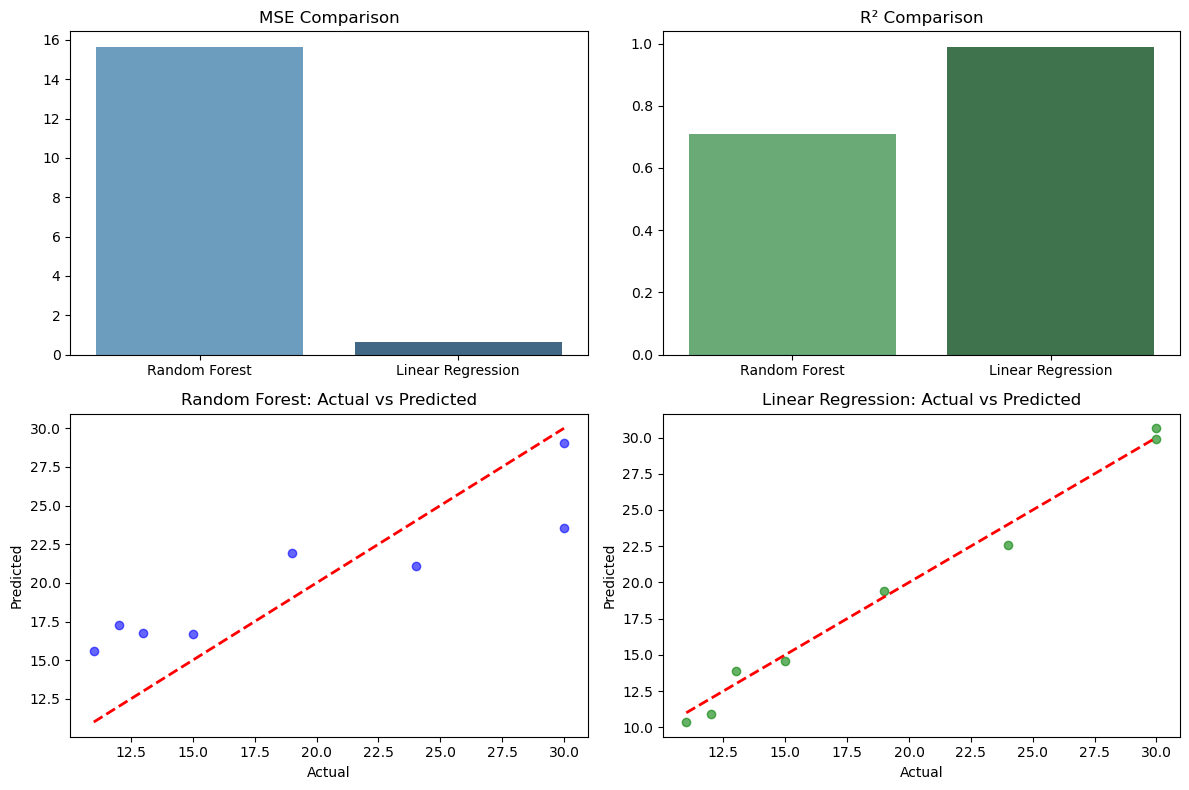

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# 1. Bar plot for MSE and R² comparison
model_names = ['Random Forest', 'Linear Regression']
mse_values = [15.65, 0.64]
r2_values = [0.71, 0.99]

# Subplot 1: Bar plot for MSE
plt.subplot(2, 2, 1)
sns.barplot(x=model_names, y=mse_values, palette='Blues_d')
plt.title('MSE Comparison')

# Subplot 2: Bar plot for R²
plt.subplot(2, 2, 2)
sns.barplot(x=model_names, y=r2_values, palette='Greens_d')
plt.title('R² Comparison')

# 2. Actual vs Predicted for Random Forest
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 3. Actual vs Predicted for Linear Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.6, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()
